In [5]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651333,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673246,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373799,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439531,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293465,36721600,INTC
...,...,...,...,...,...,...,...,...
10059,2023-03-21,144.479996,146.000000,141.466660,143.596664,139.454086,2899500,SOXX
10060,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068588,3313200,SOXX
10061,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10062,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX


In [6]:
import yfinance as yf

# Ticker symbol for INTC (Intel)
intel_symbol = 'INTC'

# Fetch INTC stock data for the past 11 years
intel_data = yf.download(intel_symbol, period='11y')

intel_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-20,42.990002,43.009998,41.41,42.200001,42.200001,74865000
2024-03-21,42.990002,43.599998,42.32,42.419998,42.419998,50807600
2024-03-22,42.250000,42.799999,42.09,42.570000,42.570000,28435300
2024-03-25,40.889999,42.220001,40.57,41.830002,41.830002,47276500
2024-03-26,41.950001,42.270000,41.66,41.990002,41.990002,39072300


[*********************100%%**********************]  1 of 1 completed


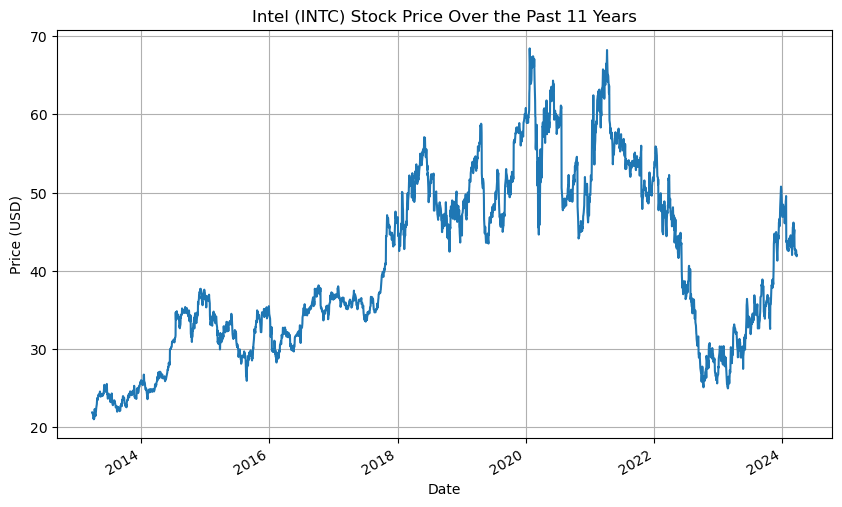

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbol for Intel
intel_symbol = 'INTC'

# Fetch Intel stock data for the past 11 years
intel_data = yf.download(intel_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
intel_data['Close'].plot()
plt.title('Intel (INTC) Stock Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [8]:
# Filter the data for INTC
intel_data = all_data[all_data['Ticker'] == 'INTC']

# Prophet expects the 'Date' and 'Close' columns
intel_data = intel_data[['Date', 'Close']]
intel_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model
model_intel = Prophet()

# Fit the model
model_intel.fit(intel_data)

# Make a future dataframe for one year past the last available date
future_intel = model_intel.make_future_dataframe(periods=365)

# Forecast
forecast_intel = model_intel.predict(future_intel)

# Print the forecast
forecast_intel[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

19:59:35 - cmdstanpy - INFO - Chain [1] start processing
19:59:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2876,2024-03-22,7.519750,-2.556823,20.084150
2877,2024-03-23,6.961019,-3.940459,20.459665
2878,2024-03-24,6.960634,-4.124592,19.697906
2879,2024-03-25,7.557011,-3.055862,20.321934
2880,2024-03-26,7.608249,-3.941497,20.606956


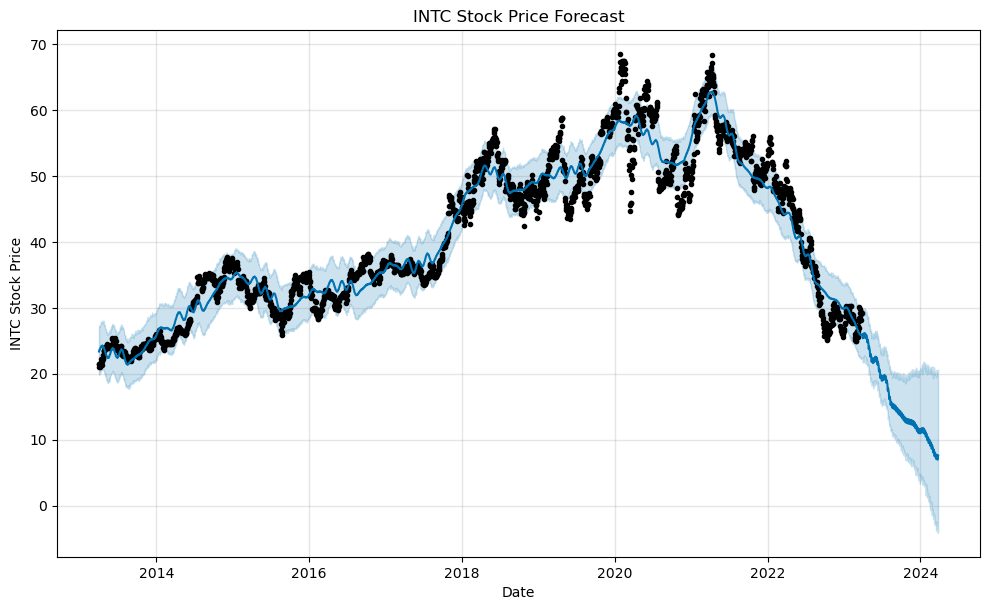

In [9]:
import matplotlib.pyplot as plt

# Plot the forecast for Intel
fig_intel = model_intel.plot(forecast_intel)
plt.xlabel('Date')
plt.ylabel('INTC Stock Price')
plt.title('INTC Stock Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


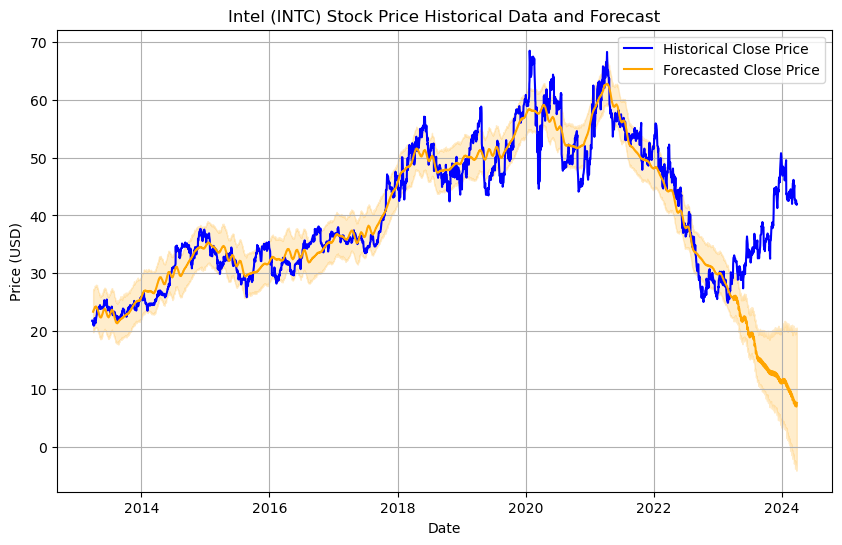

In [10]:
# Ticker symbol for Intel
intel_symbol = 'INTC'

# Fetch Intel stock data for the past 11 years
intel_data = yf.download(intel_symbol, period='11y')

# Plot both historical data and forecast for Intel
plt.figure(figsize=(10, 6))

# Plot historical data for Intel
plt.plot(intel_data.index, intel_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast for Intel
plt.plot(forecast_intel['ds'], forecast_intel['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast_intel['ds'], forecast_intel['yhat_lower'], forecast_intel['yhat_upper'], color='orange', alpha=0.2)

plt.title('Intel (INTC) Stock Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()